In [88]:
import pandas as pd

In [89]:
import os
folder = "wandb_data_reward_length"
runs = [os.path.join(run_folder, run) for run_folder in os.listdir(folder) for run in os.listdir(os.path.join(folder, run_folder))]
for run in runs:
    data = pd.read_csv(os.path.join(folder, run))
    response_length = data["response_length/mean"]
    rewards = data["critic/rewards/mean"]

In [90]:
import matplotlib.pyplot as plt

In [91]:
mix_paths = [
    "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_reward_length/70459-zhoujun-mix-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T03:15:19Z.csv",
    "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_reward_length/70459-zhoujun-mix-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-15T07:37:14Z.csv",
    "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_reward_length/70459-zhoujun-mix-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-15T11:54:03Z.csv"]

mix_data = [pd.read_csv(mix_path) for mix_path in mix_paths]

In [92]:
mix_data

[    _step  critic/scores/stem_web/std  critic/scores/codegen__taco/min  \
 0       1                    0.187638                                0   
 1       2                    0.199893                                0   
 2       4                    0.199896                                0   
 3       8                    0.246097                                0   
 4       9                    0.230615                                0   
 ..    ...                         ...                              ...   
 78    138                    0.482482                                0   
 79    140                    0.493448                                0   
 80    141                    0.495971                                0   
 81    142                    0.496696                                0   
 82    143                    0.485654                                0   
 
     response_length/codegen__livecodebench/clip_ratio  \
 0                                      

In [93]:
mix_data

# merge the dataframes
# only include the data item if _step is larger than the record

final_mix_data = None
for i in range(len(mix_data)):
    current_df = mix_data[i]
    if final_mix_data is None:
        final_mix_data = current_df
    else:
        previous_max_step = final_mix_data["_step"].max()
        current_df = current_df[current_df["_step"] > previous_max_step]
        final_mix_data = pd.concat([final_mix_data, current_df])

In [99]:
data_source_domains = {
    "Code": [
        ("codegen__leetcode2k", 216),
        ("codegen__taco", 1503),
        ("codegen__livecodebench", 75),
        ("codegen__primeintellect", 1278),
    ],
    "Logic": [
        ("logic__zebra_puzzle_dataset", 637),
        ("logic__ordering_puzzle_dataset", 605),
        ("logic__graph_logical_dataset", 905),
        ("simulation__arcagi2", 93),
        ("simulation__arcagi1", 54),
        ("simulation__barc", 765),
    ],
    "Tabular": [
        ("table__multihier", 803),
        ("table__hitab", 2269)
    ],
    "Math": [
        ("math__merged_deduped_dapo_or1_dataset", 2087),
        ("math__deepscaler_preview", 985),
    ],
    "Science": [
        ("stem_web", 3072),
    ],
    "Simulation": [
        ("simulation__codeio", 3072),
    ],
    
}

new_df_domains = {}
step_ids = final_mix_data["_step"]
for domain in data_source_domains:
    domain_sources = data_source_domains[domain]
    score_cnt = 0
    for source, count in domain_sources:
        source_score = final_mix_data[f'critic/scores/{source}/mean']
        # print(len(source_score))
        score_cnt += source_score * count / 3072
    # print(len(score_cnt))
    new_df_domains[domain] = score_cnt

In [100]:
# stats the response length this way too
new_df_response_length_domains = {}
for domain in data_source_domains:
    domain_sources = data_source_domains[domain]
    score_cnt = 0
    for source, count in domain_sources:
        source_score = final_mix_data[f'response_length/{source}/mean']
        score_cnt += source_score * count / 3072
    new_df_response_length_domains[domain] = score_cnt

In [101]:
final_mix_data["response_length/codegen__livecodebench/mean"]

0     452.312500
1     519.750000
2     499.750000
3     410.375000
4     447.093750
         ...    
56    308.781250
57    248.000000
58    295.203125
59    683.875000
60    398.656250
Name: response_length/codegen__livecodebench/mean, Length: 152, dtype: float64

In [102]:
max_mix_id = max(step_ids)

0       1
1       2
2       4
3       8
4       9
     ... 
56    265
57    266
58    269
59    270
60    272
Name: _step, Length: 152, dtype: int64
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
56    0.417112
57    0.412391
58    0.417949
59    0.413476
60    0.415890
Name: critic/scores/math__merged_deduped_dapo_or1_dataset/mean, Length: 152, dtype: float64
0       1
1       2
2       4
3       8
4       9
     ... 
56    265
57    266
58    269
59    270
60    272
Name: _step, Length: 152, dtype: int64
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
56    0.571378
57    0.576622
58    0.571820
59    0.575742
60    0.577315
Name: critic/scores/codegen__leetcode2k/mean, Length: 152, dtype: float64
0       1
1       2
2       4
3       8
4       9
     ... 
56    265
57    266
58    269
59    270
60    272
Name: _step, Length: 152, dtype: int64
0          NaN
1          NaN
2          NaN
3          N

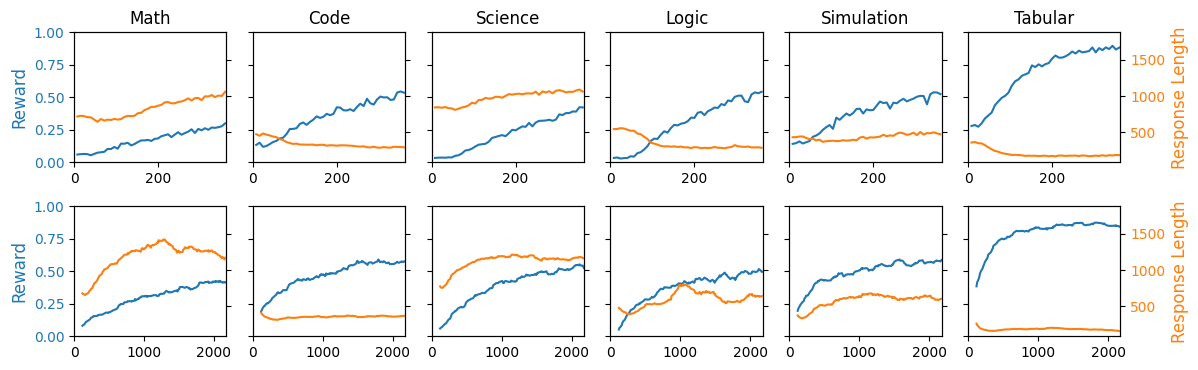

In [103]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Set the folder containing the CSVs organized by subfolders
folder = "wandb_data_reward_length"
runs = [os.path.join(folder, run_folder, run) for run_folder in os.listdir(folder)
        for run in os.listdir(os.path.join(folder, run_folder))]

# Prepare subplots in a single row
fig, axes = plt.subplots(2, 6, figsize=(12, 4))  # Wider aspect ratio
axes = axes.flatten()

# First pass: collect global min/max for unified y-axis limits
all_rewards, all_lengths = [], []
for run in runs:
    data = pd.read_csv(run)
    all_rewards.extend(data["critic/rewards/mean"].dropna())
    all_lengths.extend(data["response_length/mean"].dropna())
    
for domain in data_source_domains:
    domain_sources = data_source_domains[domain]
    for source, count in domain_sources:
        source_score = final_mix_data[f'critic/scores/{source}/mean']
        all_rewards.extend(source_score)
        all_lengths.extend(final_mix_data[f'response_length/{source}/mean'])

reward_min, reward_max = min(all_rewards), max(all_rewards)
length_min, length_max = min(all_lengths), max(all_lengths)

# Second pass: plot
runs_dict = {
    "Math": "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_reward_length/71131-zhoujun-math3k-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T10:34:02Z.csv",
    "Code": "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_reward_length/72107-zhoujun-codegen3k-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T22:15:14Z.csv",
    "Logic": "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_reward_length/71130-zhoujun-logic3k-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T10:33:53Z.csv",
    "Simulation": "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_reward_length/71162-zhoujun-simulation3k-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T11:08:31Z.csv",
    "Tabular": "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_reward_length/71136-zhoujun-table3k-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T10:41:24Z.csv",
    "Science": "/lustrefs/users/shibo.hao/Reasoning360-May/analysis/wandb_data_reward_length/71138-zhoujun-stem3k-guru18k-models--Qwen--Qwen2.5-7B-think/run_data_2025-05-14T10:45:56Z.csv",
}

orders = ["Math", "Code", "Science", "Logic", "Simulation", "Tabular"]

# first row: runs_dict
for idx, run_title in enumerate(orders):
    
    run_path = runs_dict[run_title]
    data = pd.read_csv(run_path)
    
    data = data[data["_step"] <= max_mix_id / 6]
    
    rewards = data["critic/rewards/mean"]
    response_length = data["response_length/mean"]

    ax1 = axes[idx]
    ax2 = ax1.twinx()

    ax1.plot(data["_step"] * 8, rewards, color='C0')
    ax2.plot(data["_step"] * 8, response_length, color='C1')

    ax1.set_ylim(reward_min, reward_max)
    ax2.set_ylim(length_min, length_max)
    ax1.set_xlim(0, max_mix_id / 6 * 8)

    # Only show y-axis labels on the first and last subplots
    if idx != 0:
        ax1.set_yticklabels([])
        ax1.set_ylabel("")
    else:
        ax1.set_ylabel("Reward", color='C0', fontsize=12)

    if idx != 5:
        ax2.set_yticklabels([])
        ax2.set_ylabel("")
    else:
        ax2.set_ylabel("Response Length", color='C1', fontsize=12)

    ax1.tick_params(axis='y', labelcolor='C0')
    ax2.tick_params(axis='y', labelcolor='C1')
    ax1.set_title(run_title, fontsize=12)

# second row: put the content of new_df_domains into the subplots
for idx, domain in enumerate(orders):
    ax1 = axes[idx + 6]
    ax2 = ax1.twinx()
    
    # smooth the data
    new_df_domains[domain] = new_df_domains[domain].rolling(window=10).mean()
    new_df_response_length_domains[domain] = new_df_response_length_domains[domain].rolling(window=10).mean()
    
    print(step_ids)
    print(new_df_domains[domain])
    ax1.plot(step_ids * 8, new_df_domains[domain], color='C0')
    ax2.plot(step_ids * 8, new_df_response_length_domains[domain], color='C1')
    ax1.set_ylim(reward_min, reward_max)
    ax2.set_ylim(length_min, length_max)
    ax1.set_xlim(0, max_mix_id * 8)
    if idx != 0:
        ax1.set_yticklabels([])
        ax1.set_ylabel("")
    else:
        ax1.set_ylabel("Reward", color='C0', fontsize=12)

    if idx != 5:
        ax2.set_yticklabels([])
        ax2.set_ylabel("")
    else:
        ax2.set_ylabel("Response Length", color='C1', fontsize=12)


    ax1.tick_params(axis='y', labelcolor='C0')
    ax2.tick_params(axis='y', labelcolor='C1')

# Add shared legend
# fig.legend(["Reward", "Response Length"], loc='lower center', ncol=2, fontsize=12)
plt.tight_layout(rect=[0, 0.05, 1, 1])
# plt.show()
plt.savefig("reward_length_domains.pdf", dpi=300, bbox_inches="tight")

In [ ]:
new_df_domains["logic"]

In [23]:
# directory = "/lustrefs/users/shibo.hao/leo/Reasoning360/data/train_guru18k"
# # list all files in the directory and open the parquet files
# # the count the 
# for file in os.listdir(directory):
#     if file.endswith(".parquet"):
#         data = pd.read_parquet(os.path.join(directory, file))
#         # stats
#         print(data["data_source"].value_counts())

In [ ]:
# todo:
# - 更新codegen
# - 更新mix (对齐x轴)
# - 颜色, 图例, annotation (joint/separate)
# - 更新标题, codegen, etc.
# - 更新RL step -> gradient update step

